In [1]:
from pysead import Truss_3D
%matplotlib widget

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive
Frame Moment Release: All elements that is connected to the same release node should be released at node end of the element


In [2]:
nodes = {1: [0,-4,0], 2:[-3,0,0], 3:[0,4,0], 4:[0,0,5]}
elements = {1:[4,1], 2:[4,2], 3:[3,4]}
elasticity = {key: 200_000_000 for key in elements}
area = {1: 0.001, 2: 0.002, 3:0.001}
supports = {1:[1,1,1], 2:[1,1,1], 3:[1,1,1]}
forces = {4:[12,10,20]}

In [3]:
Three_Bar_Truss = Truss_3D(nodes = nodes,
                           elements=elements,
                           elasticity=elasticity,
                           cross_area=area,
                           supports=supports,
                           forces= forces)

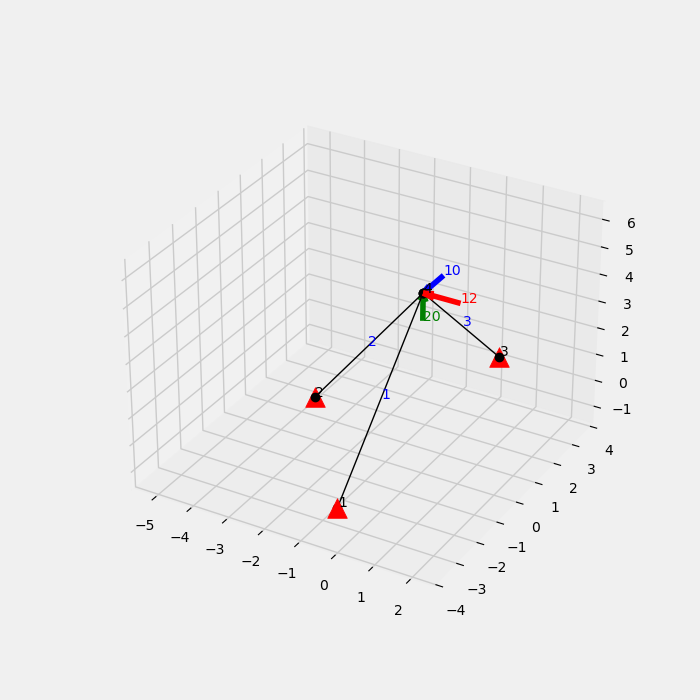

In [4]:
Three_Bar_Truss.Draw_Truss_Setup()

In [5]:
Three_Bar_Truss.Solve()

Positive Stress/Force is in Tension, Negative Stress/Force is in Compression


In [6]:
Three_Bar_Truss.member_forces_

{1: 8.000000000000002, 2: 23.29411764705882, 3: -8.000000000000002}

In [7]:
Three_Bar_Truss.reactions_


{1: [0.0, -5.0, -6.25], 2: [-12.0, 0.0, -20.0], 3: [0.0, -5.0, 6.25]}

In [8]:
Three_Bar_Truss.displacements_

{1: [0.0, 0.0, 0.0],
 2: [0.0, 0.0, 0.0],
 3: [0.0, 0.0, 0.0],
 4: [0.00066, 0.00041, 0.0]}

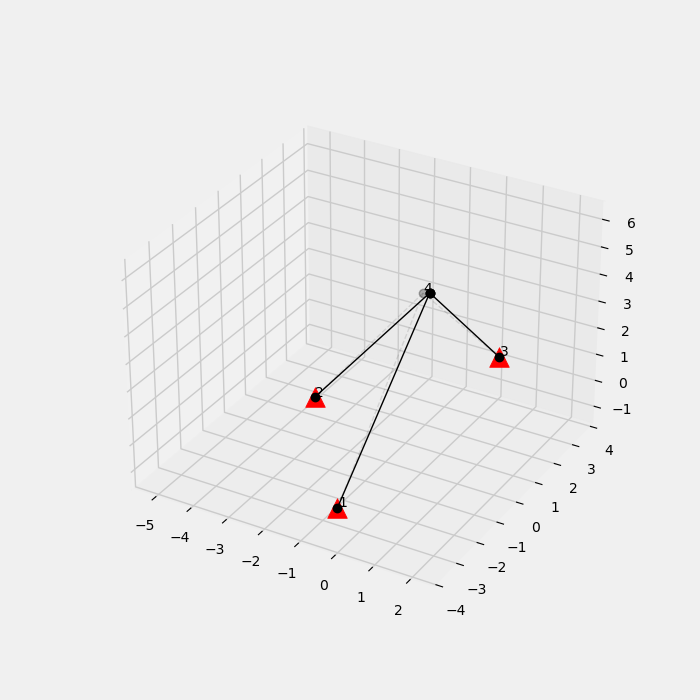

In [9]:
Three_Bar_Truss.Draw_Truss_Displacements(magnification_factor=200)

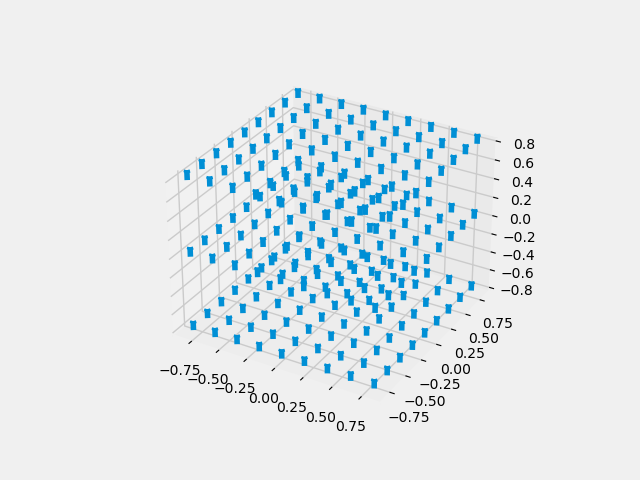

In [10]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = 0
v = 0
w = 1

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()